In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import io

'''
Our aim is to factorize matrix using scikit library's function performing coordinate descent

We load our data and convert it into matrix form to be fed to NMF
'''
rating_column_names = 'user id | item id | rating | timestamp'.split(' | ')
data = pd.read_csv(io.BytesIO(uploaded["u.data"]),sep='\t',header = None, names = rating_column_names)
matrix = data.pivot(index='user id',
                               columns='item id',
                               values='rating').fillna(0)

Saving u.data to u (1).data


'%r'

In [0]:
from sklearn.decomposition import NMF

'''
This method accepts the original reating and evalutes RMSE with predicted ratings
'''
def predict(X,new_X):
      actual_score = []
      y_pred = []
      for index,row in X.iterrows():
        user,item=int(row['user id']),int(row['item id'])
        actual_score.append(row['rating'])
        y_pred.append(new_X[item][user])
      return np.sqrt(np.sum((np.array(actual_score) - np.array(y_pred)) ** 2)/len(actual_score))

'''
Creates folds with indexes for 943 items
'''
def folds():
  folds = {}
  indexes = np.arange(1,944,1)
  unit_length= round(len(indexes)/3)
  np.random.shuffle(indexes)
  a,b=0,unit_length
  for i in range(3):
    folds[i]=indexes[a:b]
    a=b
    b+=unit_length
  return folds
  
'''
creates combination hyper parameters
'''
def create_combination(max_iter,n_components,alpha):
  h_p = []
  for x in max_iter:
    for y in n_components:
      for z in alpha:
        h_p.append([x,y,z])
  return h_p
'''
Performs grid search using validation set 
return the score matrix and hyper parameter with lowest RMSE
''' 
def grid_search(h_p):
  # perform grid search            
  grid_score={}
  k=0
  for itr,n,alp in h_p:
    nmf = NMF(n_components=n,solver='cd', max_iter=itr, alpha=alp)
    fold = folds()
    score=0
    for i in range(0,3):
      nmf.fit(matrix.drop(index=fold[i]))
      H = pd.DataFrame(nmf.components_, columns=matrix.columns)
      W = pd.DataFrame(nmf.transform(matrix), columns=H.index)
      reconstructed = pd.DataFrame(np.dot(W,H), columns=matrix.columns)
      reconstructed.index = matrix.index
      score+=predict(data.loc[fold[i]],reconstructed)
    grid_score[k]=(score)/3
    k+=1
  return grid_score,min(grid_score, key=grid_score.get)
#forming the set of hyperparameter 

'''
Method to fit and predict the rating 
'''
def fit_predict(data,X_test,n_components,max_iter,alpha,solver='cd'):
  X = data.pivot(index='user id',
                               columns='item id',
                               values='rating').fillna(0)
  #create NMF object, fit the data, and reconstruct our rating matrix (user x item)
  nmf = NMF(n_components=n,solver='cd', max_iter=itr, alpha=alp)
  nmf.fit(X)
  H = pd.DataFrame(nmf.components_, columns=matrix.columns)
  W = pd.DataFrame(nmf.transform(matrix), columns=H.index)
  reconstructed = pd.DataFrame(np.dot(W,H), columns=matrix.columns)
  reconstructed.index = matrix.index
  return predict(data,reconstructed)
  
  

In [0]:
#hyper parameter list  
max_iter = [50,100,150,200]
n_components=[20,25,30]
alpha=[0.01,0.001,0.0001]
# iterate over all possible combination of hyperparameters
hyperP = create_combination(max_iter,n_components,alpha)
#return the score dictionary and index of min combination 
scores,lowest_key = grid_search(hyperP)

In [73]:
#list down all the RMSE of Grid
print("Iter K  Alpha")
for k,v in scores.items():
  print(hyperP[k],"--->", np.around(v,4))

Iter K  Alpha
[50, 20, 0.01] ---> 2.2594
[50, 20, 0.001] ---> 2.2542
[50, 20, 0.0001] ---> 2.2354
[50, 25, 0.01] ---> 2.1998
[50, 25, 0.001] ---> 2.2316
[50, 25, 0.0001] ---> 2.1897
[50, 30, 0.01] ---> 2.1924
[50, 30, 0.001] ---> 2.1891
[50, 30, 0.0001] ---> 2.179
[100, 20, 0.01] ---> 2.2511
[100, 20, 0.001] ---> 2.2455
[100, 20, 0.0001] ---> 2.2586
[100, 25, 0.01] ---> 2.2274
[100, 25, 0.001] ---> 2.1983
[100, 25, 0.0001] ---> 2.21
[100, 30, 0.01] ---> 2.17
[100, 30, 0.001] ---> 2.1778
[100, 30, 0.0001] ---> 2.1814
[150, 20, 0.01] ---> 2.242
[150, 20, 0.001] ---> 2.2432
[150, 20, 0.0001] ---> 2.2435
[150, 25, 0.01] ---> 2.2021
[150, 25, 0.001] ---> 2.2186
[150, 25, 0.0001] ---> 2.2212
[150, 30, 0.01] ---> 2.1754
[150, 30, 0.001] ---> 2.185
[150, 30, 0.0001] ---> 2.1809
[200, 20, 0.01] ---> 2.2689
[200, 20, 0.001] ---> 2.2405
[200, 20, 0.0001] ---> 2.2621
[200, 25, 0.01] ---> 2.2155
[200, 25, 0.001] ---> 2.2056
[200, 25, 0.0001] ---> 2.2143
[200, 30, 0.01] ---> 2.1906
[200, 30, 0.001] 

In [75]:
from google.colab import files
uploaded = files.upload()
rating_column_names = 'user id | item id | rating | timestamp'.split(' | ')
test_data = pd.read_csv(io.BytesIO(uploaded["ua.test"]),sep='\t',header = None, names = rating_column_names)
test_matrix = data.pivot(index='user id',
                               columns='item id',
                               values='rating').fillna(0)

Saving ua.test to ua (3).test


In [123]:
#Hyperparameter with lowest RMSE
print(hyperP[lowest_key])

[200, 30, 0.001]


In [79]:
#Evaluate the test set performance on the best hyperparameters
score = fit_predict(data,test_matrix,n_components=30,max_iter=200,alpha=0.001,solver='cd')
print(score)

2.160357769236872


**We can observe that our test set performance is lower compared to our custom implementation, this could be due to Coordinate Descent which might not work well here. However as we will see further NMF can give good performance if we remove the restriction of using Coordinate Descent**

We will be comparing this performance against the *Surprise* library.

**We will be evaluating the performance of different matrix factorization methods under Surprise API. We will benchmark their performance against the Cross Validation Score obtained on 3 fold CV**

In [0]:
!pip install surprise

In [0]:
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

# We'll use SVD,NMF and SVD++ algorithm.
algo1 = SVD()
algo2 = NMF()
algo3 = SVDpp()

In [126]:
# Run 3-fold cross-validation and print results
svd = cross_validate(algo1, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9481  0.9396  0.9462  0.9446  0.0036  
Fit time          4.98    4.93    4.90    4.94    0.03    
Test time         0.40    0.24    0.36    0.34    0.07    


In [127]:

# Run 3-fold cross-validation and print results
nmf = cross_validate(algo2, data, measures=['RMSE'], cv=3, verbose=True)


Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9700  0.9712  0.9808  0.9740  0.0048  
Fit time          5.43    5.35    5.42    5.40    0.03    
Test time         0.34    0.21    0.21    0.26    0.06    


In [128]:
# Run 3-fold cross-validation and print results
svdpp = cross_validate(algo3, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9271  0.9233  0.9275  0.9260  0.0019  
Fit time          160.81  162.17  162.02  161.67  0.61    
Test time         5.43    5.50    5.03    5.32    0.21    


In [0]:
rmse=[np.mean(svd['test_rmse']),np.mean(nmf['test_rmse']),np.mean(svdpp['test_rmse'])]
fit_time=[np.mean(svd['fit_time']),np.mean(nmf['fit_time']),np.mean(svdpp['fit_time'])]
test_time=[np.mean(svd['test_time']),np.mean(nmf['test_time']),np.mean(svdpp['test_time'])]

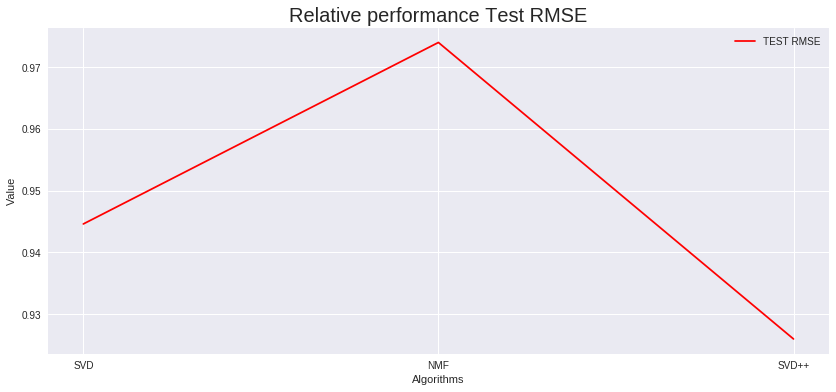

In [161]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(14,6))
plt.plot(["SVD","NMF","SVD++"],rmse,color='r')
plt.legend(['TEST RMSE'])
plt.xlabel('Algorithms')
plt.ylabel('Value')
plt.title("Relative performance Test RMSE", fontsize = 20)
plt.show()

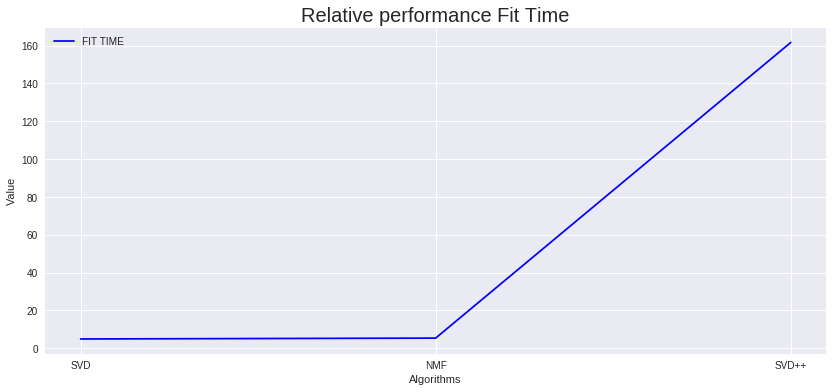

In [164]:
fig = plt.figure(1, figsize=(14,6))

plt.plot(["SVD","NMF","SVD++"],fit_time,color='b')
plt.legend(['FIT TIME'])
plt.xlabel('Algorithms')
plt.ylabel('Value')
plt.title("Relative performance Fit Time", fontsize = 20)
plt.show()

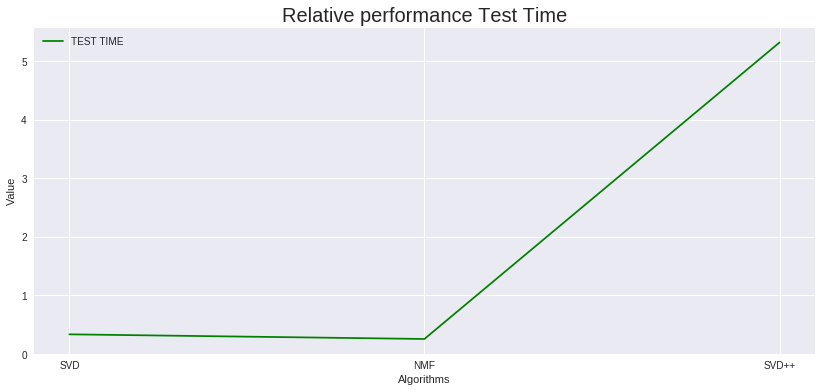

In [167]:
fig = plt.figure(1, figsize=(14,6))
plt.plot(["SVD","NMF","SVD++"],test_time,color='g')
plt.legend(['TEST TIME'])
plt.xlabel('Algorithms')
plt.ylabel('Value')
plt.title("Relative performance Test Time", fontsize = 20)
plt.show()

As we can see NMF offers a decent choice for our matrix factorization.


1.   NMF has relatively very low fitting time when compared with SVD++.
2.   NMF have nearly same test RMSE score when compared with SVD (differs by 0.02)
3.   NMF thus can give us an optimal result, which is demonstrated in our findings.

**Compared to our custom results**



1.   Our Custom model performs a better prediction, this might be due to the item and user bias that we are adding.
2.   In the original paper [here](https://https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetix%5D.pdf) , adding bias clearly reduces the overall RMSE error
3.   Another reason could be due to the use of regularization, which reduces the overfitting in our model.

